### Assignment 4, Due Thursday, 9 May, 2024 @ 11:59PM

### Name: Mahmoud Ali     ID: 202103840

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

torch.set_printoptions(precision=4, sci_mode=False)

# Q1 Gradient Descent [25 pts]
1.1) [5pts] Write function `f(x)` that returns the value of the function $f(x) = 3x^2 + 12x$ \
Test the function by calling it with $x=3$ and print the result

In [106]:
# Write your code here

def f(x):
    return 3*x*x + 12*x

print("f(3) =", f(3))

f(3) = 63


1.2) [5pts] Plot the function $f(x)$ in the range $-10 \leq x \leq 10$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


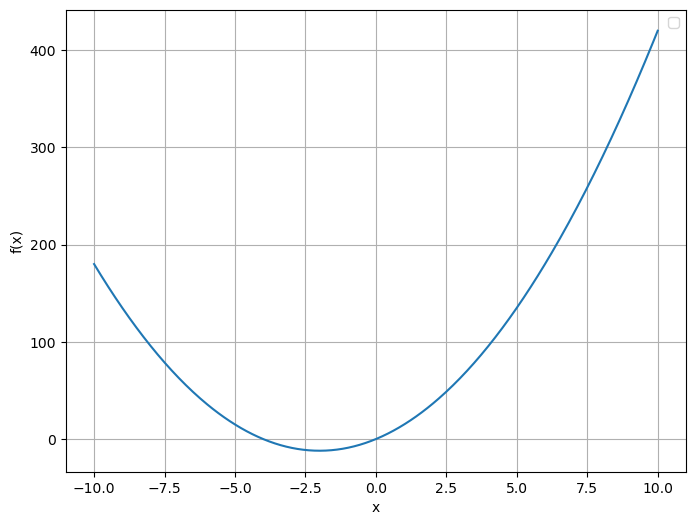

In [107]:
# Write your code here
x_values = np.linspace(-10, 10, 400)
y_values = f(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show() 

1.3) [5pts] Write function `df(x)` that returns the value of the derivative of the function $f(x)$\
Test the df function by calling it with $x=3$ and print the result

In [108]:
# Write your code here

def df(x):
    return 6*x + 12

print("df(3) =", df(3))

df(3) = 30


1.4) [10pts] Write a gradient_descent function that finds the minimum for the function $f(x)$.
The function should take the following arguments:
- `x` : initial guess
- `learning_rate` : learning rate with default value of 0.1
- `n_iters` : number of iterations with default value of 100

Test the method by calling it with $x=10$ and print the result

In [109]:
# Write your code here
def gradient_descent(x,learning_rate=0.1,n_iters=100):
    for i in range(n_iters):
        x = x - learning_rate*df(x)
    return x

print(f"x_min = {gradient_descent(10)} f(x_min) = {f(gradient_descent(10))}")

x_min = -2.0 f(x_min) = -12.0


# Q2 PyTorch autograd [25 pts]
2.1) [10pts] Reimplement df(x) for getting the gradient of f(x) (done in Q1.3) using PyTorch autograd \
Test the function by calling it with $x=3.0$ and print the result

In [110]:
# Write your code here

def df(x):
    x = torch.tensor(float(x), requires_grad=True)
    y = f(x)

    y.backward()
    return x

print("df(3) =", df(3).grad)


df(3) = tensor(30.)


3.2) [15pts] Reimplement gradient_descent function (done in Q1.4) using PyTorch autograd \
Test the function by calling it with $x=10.0$ and print the result

In [111]:
# Write your code here
def gradient_descent(x,learning_rate=0.1,n_iters=100):
    x = torch.tensor([float(x)], requires_grad=True)
    for i in range(n_iters):
        y = f(x)
        y.backward()

        with torch.no_grad():
            x -= learning_rate * x.grad
        x.grad.zero_()

    return x

print(f"x_min = {gradient_descent(10)} f(x_min) = {f(gradient_descent(10))}")

x_min = tensor([-2.], requires_grad=True) f(x_min) = tensor([-12.], grad_fn=<AddBackward0>)


# Q3 Train a NN using IRIS dataset (50 pts)

In [112]:
# Import the iris dataset from sklearn
iris = load_iris()
X = iris['data']
y = iris['target']
y_class = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Checking the dataset length
print("Number of features: ", X.shape[1])
print("Number of classes: ", len(y_class))
print("Length of train dataset: ", X_train.shape[0])
print("Length of test dataset: ", X_test.shape[0])

# Convert the numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

Number of features:  4
Number of classes:  3
Length of train dataset:  120
Length of test dataset:  30


3.1) [20pts] Create a neural network model with the following architecture:
- Input layer
- Hidden layer with 64 units and ReLU activation
- Hidden layer with 32 units and ReLU activation
- Output layer with 3 units and softmax activation

In [113]:
# Write your code here

class NeuralNetwork(nn.Module):
    def __init__(self, size=4, hidden1=64,hidden2=32,outp=3):
        super().__init__()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        self.hidden1 = nn.Linear(size, hidden1)
        self.hidden2 = nn.Linear(hidden1, hidden2)
        self.output = nn.Linear(hidden2, outp)

    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu(out);
        out = self.hidden2(out)
        out = self.relu(out)
        out = self.output(out)
        out = self.softmax(out)
        return out

3.2) [20pts] Train the model for 100 epochs and print the training loss every 10 iteration during the training \
- Use the Adam optimizer, CrossEntropyLoss function and a Learning Rate of 0.01

In [146]:
# Write your code here
torch.manual_seed(48)
model = NeuralNetwork()

# Loss Function Optimizer
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# Train the model
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = lossfun(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.7469
Epoch [20/100], Loss: 0.6306
Epoch [30/100], Loss: 0.5836
Epoch [40/100], Loss: 0.5714
Epoch [50/100], Loss: 0.5672
Epoch [60/100], Loss: 0.5644
Epoch [70/100], Loss: 0.5627
Epoch [80/100], Loss: 0.5618
Epoch [90/100], Loss: 0.5613
Epoch [100/100], Loss: 0.5609


3.3) [10pts] Test the model on the test set and print the following:
- Print the first 5 model predictions, predicted classes and actual classes
- Compute and print the accuracy of the model

In [148]:
# Write your code here
sample = model(X_test[0:5]).detach()

print("First 5 predictions", sample)
print("First 5 predicted classes :", torch.argmax(sample, dim=1))
print("First 5 actual classes (y_test) :", y_test[0:5])

model.eval()
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i in range(len(X_test)):
        outputs = model(X_test[i])

        n_samples += y_test[i]
        n_correct += (torch.argmax(outputs) == y_test[i]).sum().item()

    acc = n_correct / n_samples
    print("Accuracy:", acc.item())

First 5 predictions tensor([[    0.0000,     1.0000,     0.0000],
        [    0.9996,     0.0004,     0.0000],
        [    0.0000,     0.0000,     1.0000],
        [    0.0000,     0.9994,     0.0006],
        [    0.0000,     1.0000,     0.0000]])
First 5 predicted classes : tensor([1, 0, 2, 1, 1])
First 5 actual classes (y_test) : tensor([1, 0, 2, 1, 1])
Accuracy: 0.9677419066429138
